In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv',  encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename({'v1':'Target', 'v2':'Text'}, inplace=True, axis=1)

In [11]:
df.columns

Index(['Target', 'Text'], dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['Target'] = encoder.fit_transform(df['Target'])

In [14]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(keep='first', inplace=True)

In [17]:
df.duplicated().sum()

0

# EDA

In [18]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

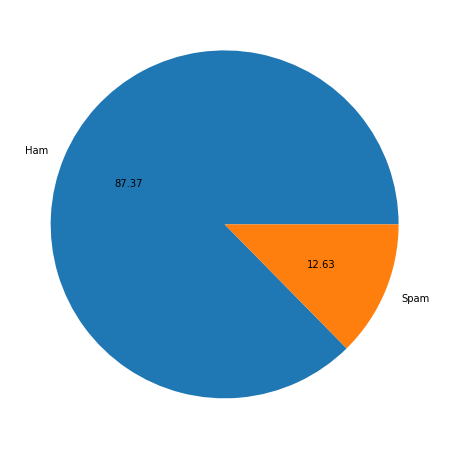

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

Looking, Data is imbalanced.

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['num_char']=df['Text'].apply(len)

In [22]:
df['num_words']=df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [23]:
df['num_sen']=df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Target,Text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_char', 'num_words', 'num_sen']].describe()

,num_char,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [26]:
import seaborn as sns

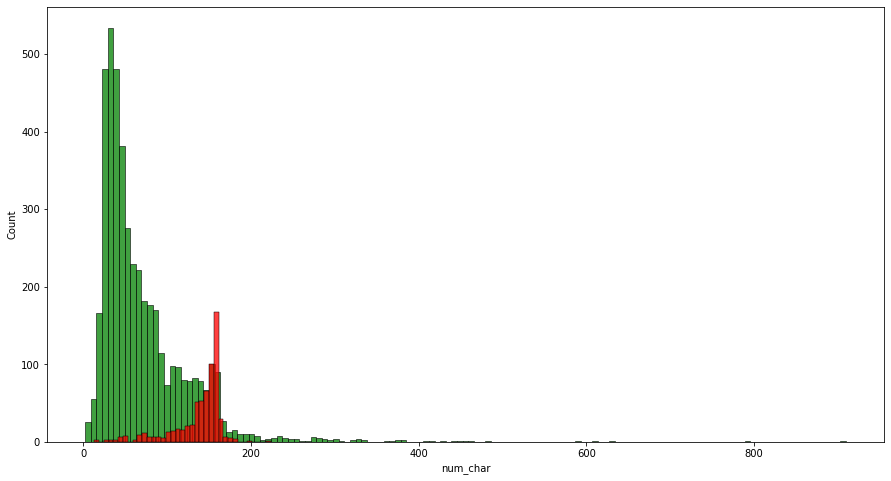

In [27]:
plt.figure(figsize = (15, 8))
sns.histplot(df[df['Target'] == 0]['num_char'],  color='g')
sns.histplot(df[df['Target'] == 1]['num_char'], color='r')

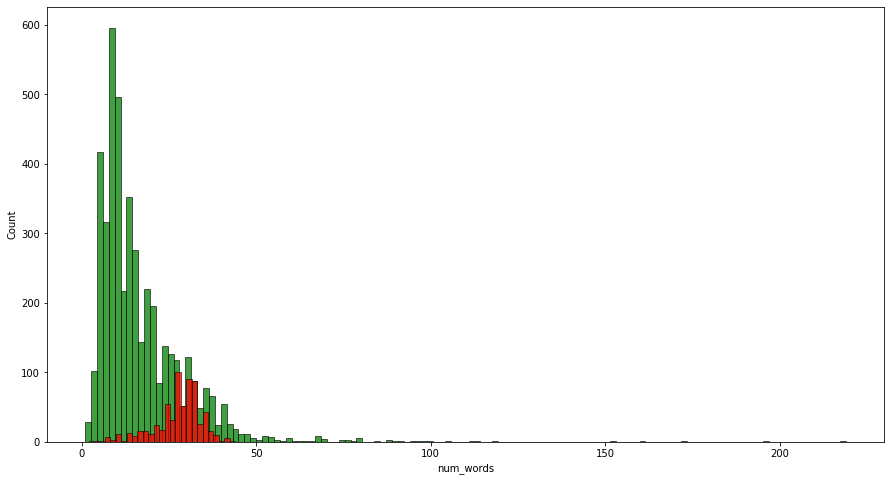

In [28]:
plt.figure(figsize = (15, 8))
sns.histplot(df[df['Target'] == 0]['num_words'],  color='g')
sns.histplot(df[df['Target'] == 1]['num_words'], color='r')    

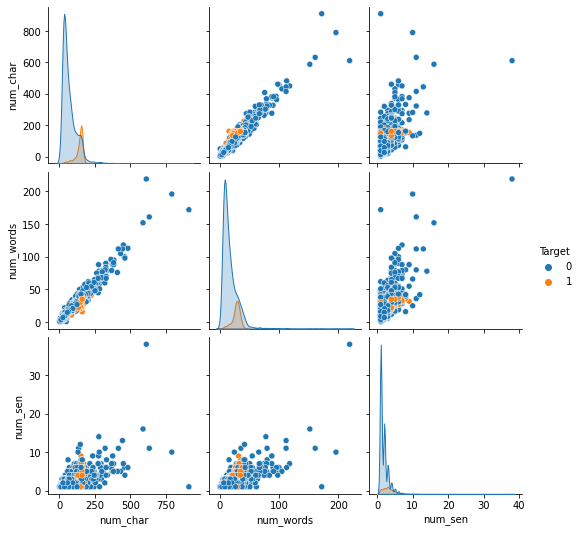

In [29]:
sns.pairplot(df, hue='Target')

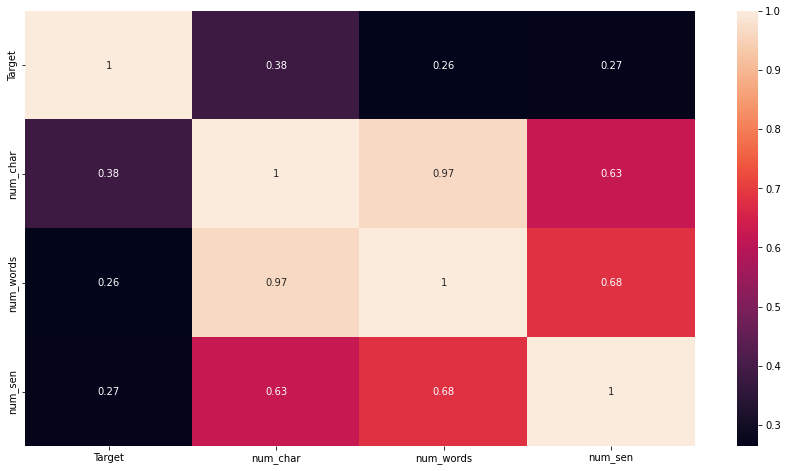

In [30]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)

# Data Preprocessing

* Lowe Case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [31]:
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
text_transform('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [33]:
df['Text_transform']= df['Text'].apply(text_transform)

In [34]:
df.head()

,Target,Text,num_char,num_words,num_sen,Text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
#Wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2')

In [36]:
spam_c = wc.generate(df[df['Target'] == 1]['Text_transform'].str.cat(sep=' '))

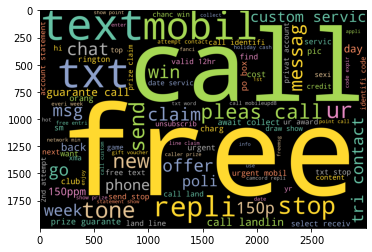

In [37]:
plt.imshow(spam_c)

In [38]:
ham_c = wc.generate(df[df['Target'] == 0]['Text_transform'].str.cat(sep=' '))

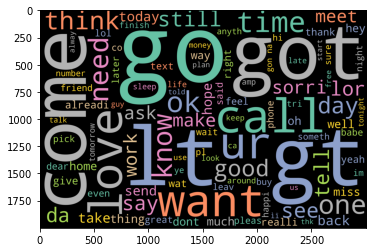

In [39]:
plt.imshow(ham_c)

In [40]:
spam_corpus = []
for msg in df[df['Target']==1]['Text_transform'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
    

In [41]:
len(spam_corpus)

9883

In [42]:
from collections import Counter

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


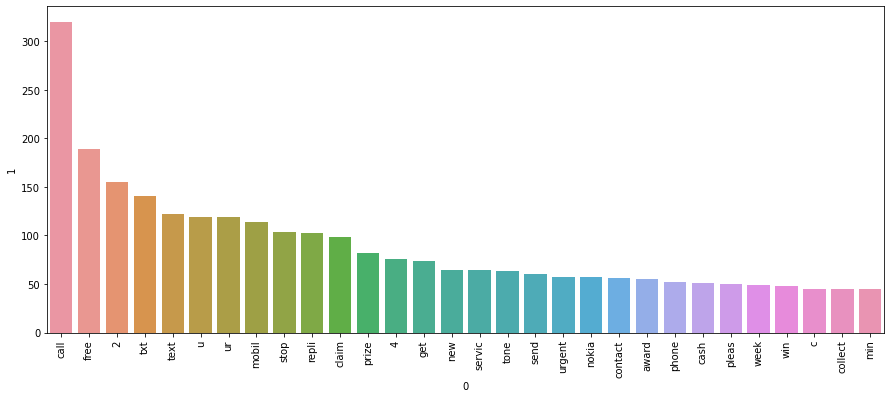

In [43]:
plt.figure(figsize=(15, 6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.rc('xtick', labelsize=15) 

In [44]:
ham_corpus = []
for msg in df[df['Target']==0]['Text_transform'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
    

In [45]:
len(ham_corpus)

34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


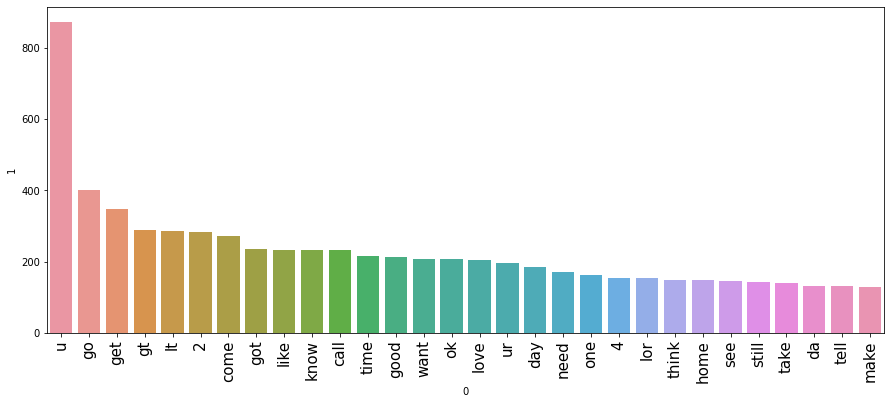

In [46]:
plt.figure(figsize=(15, 6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.rc('xtick', labelsize=15) 

# Model Building Part

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [48]:
x = tf.fit_transform(df['Text_transform']).toarray()

In [49]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
x.shape

(5169, 3000)

In [51]:
y = df['Target'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
y.shape

(5169,)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [57]:
GB = GaussianNB()
MB = MultinomialNB()
BB = BernoulliNB()

In [58]:
GB.fit(x_train, y_train)
y_pred1 = GB.predict(x_test)
print(f"Accuracy Score :  {accuracy_score(y_test, y_pred1)}")
print(f'''Confusion Matrix : 
{confusion_matrix(y_test, y_pred1)}''')
print(f"Precision Score : {precision_score(y_test, y_pred1)}")

Accuracy Score :  0.867504835589942
Confusion Matrix : 
[[785 111]
 [ 26 112]]
Precision Score : 0.5022421524663677


In [75]:
MB.fit(x_train, y_train)
y_pred2 = MB.predict(x_test)
print(f"Accuracy Score :  {accuracy_score(y_test, y_pred2)}")
print(f'''Confusion Matrix : 
{confusion_matrix(y_test, y_pred2)}''')
print(f"Precision Score : {precision_score(y_test, y_pred2)}")

Accuracy Score :  0.9729206963249516
Confusion Matrix : 
[[896   0]
 [ 28 110]]
Precision Score : 1.0


In [60]:
BB.fit(x_train, y_train)
y_pred3 = BB.predict(x_test)
print(f"Accuracy Score :  {accuracy_score(y_test, y_pred3)}")
print(f'''Confusion Matrix : 
{confusion_matrix(y_test, y_pred3)}''')
print(f"Precision Score : {precision_score(y_test, y_pred3)}")

Accuracy Score :  0.9816247582205029
Confusion Matrix : 
[[895   1]
 [ 18 120]]
Precision Score : 0.9917355371900827


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

In [63]:
clfs = {
    'SVC': svc,
    'KNeighborsClassifier': knc,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dtc,
    'LogisticRegression': lrc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier': gbdt,
    'XGBClassifier': xgb
}

In [64]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [65]:
a_scores = []
p_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    a_scores.append(current_accuracy)
    p_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KNeighborsClassifier
Accuracy -  0.9052224371373307
Precision -  1.0
For  MultinomialNB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DecisionTreeClassifier
Accuracy -  0.9458413926499033
Precision -  0.8153846153846154
For  LogisticRegression
Accuracy -  0.9516441005802708
Precision -  0.9680851063829787
For  RandomForestClassifier
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoostClassifier
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BaggingClassifier
Accuracy -  0.9487427466150871
Precision -  0.8571428571428571
For  ExtraTreesClassifier
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GradientBoostingClassifier
Accuracy -  0.9564796905222437
Precision -  0.9345794392523364
For  XGBClassifier
Accuracy -  0.9574468085106383
Precision -  0.9607843137254902


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':a_scores,'Precision':p_scores}).sort_values('Precision',ascending=False)

In [67]:
performance_df

,Algorithm,Accuracy,Precision
1,KNeighborsClassifier,0.905222,1.000000
2,MultinomialNB,0.972921,1.000000
5,RandomForestClassifier,0.975822,0.982906
8,ExtraTreesClassifier,0.977756,0.975207
4,LogisticRegression,0.951644,0.968085
0,SVC,0.974855,0.966667
10,XGBClassifier,0.957447,0.960784
9,GradientBoostingClassifier,0.956480,0.934579
6,AdaBoostClassifier,0.964217,0.931624
7,BaggingClassifier,0.948743,0.857143


### **#Model Improment**

In [68]:
# import pickle
# pickle.dump(tf, open('Vectorizer.pkl','wb'))
# pickle.dump(mnb, open('Model.pkl','wb'))

### ***Model Is Ready to use ***

In [73]:
text = 'Money call you up'
MB.predict(text)

ValueError: ignored